In [3]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))  
from tools.dictionary import *

import pandas as pd
db1 = pd.read_feather('data/financial_reports_upto_2023-10-06_part1.feather')

# code_list = db1['code'].unique().tolist()+db2['code'].unique().tolist()+db3['code'].unique().tolist()


In [92]:
code = '005930'
record = db1.loc[db1['code']==code]

TypeError: unsupported operand type(s) for /: 'BarContainer' and 'int'

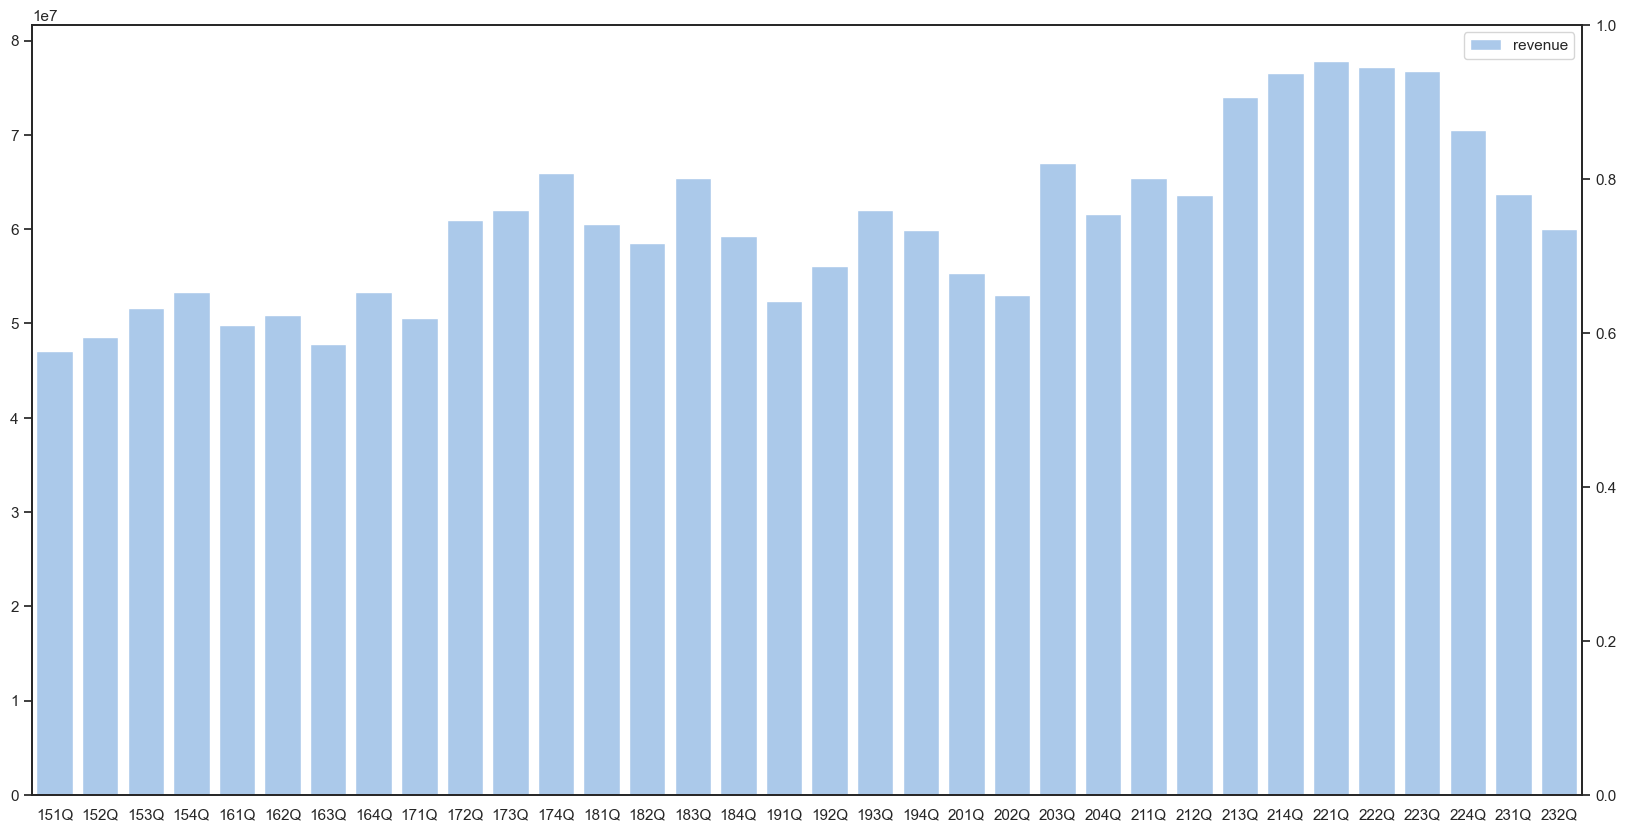

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

y1 = db1.loc[(db1['code']==code) & (db1['fs_div']=='CFS') & (db1['account']=='revenue')]
y2 = db1.loc[(db1['code']==code) & (db1['fs_div']=='CFS') & (db1['account']=='operating_income')] 
# y3 = y2.div(y1.values)
y_ = y1.isnull()*y2.isnull().values
quarter_cols= [s for s in record.columns.values if (not y_[s].values[0]) and ('Q' in s)]

y1 = y1[quarter_cols].values[0]/KRW_UNIT
y2 = y2[quarter_cols].values[0]/KRW_UNIT
y3 = y2/y1*100
x = [s.replace('2020','XX').replace('20','').replace('XX','20').replace('_','') for s in quarter_cols]

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 10))
axr = ax.twinx()
sns.set_color_codes("pastel")
sns.barplot(x=x, y=y1, ax = ax, label="revenue", color="b")
ax.bar_label(ax.containers[0])
sns.set_color_codes("muted")
sns.barplot(x=x, y=y2, ax = ax, label="op_income", color="b")
ax.bar_label(ax.containers[1])
ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set(ylabel="1,000,000 KRW", xlabel="quarters")
sns.lineplot(x=x, y=y3, ax = axr, label="op_income rate", color="r", marker='o')
axr.legend(ncol=1, loc="upper right", frameon=False)
axr.set(ylabel="percent(%)")
# ax.set(xlim=(0,len(x)), ylim=(0,max(y1)*1.1))
sns.despine(left=True, bottom=True)
# plt.show()


['2015_1Q', '2015_2Q', '2015_3Q', '2015_4Q', '2016_1Q', '2016_2Q', '2016_3Q', '2016_4Q', '2017_1Q', '2017_2Q', '2017_3Q', '2017_4Q', '2018_1Q', '2018_2Q', '2018_3Q', '2018_4Q', '2019_1Q', '2019_2Q', '2019_3Q', '2019_4Q', '2020_1Q', '2020_2Q', '2020_3Q', '2020_4Q', '2021_1Q', '2021_2Q', '2021_3Q', '2021_4Q', '2022_1Q', '2022_2Q', '2022_3Q', '2022_4Q', '2023_1Q', '2023_2Q']
[[5979367000000 6897937000000 7393373000000 6142765000000 6675812000000
  8143950000000 5200089000000 9220821000000 9898361000000 14066547000000
  14533159000000 15146971000000 15642170000000 14869035000000
  17574865000000 10800599000000 6233282000000 6597065000000 7777892000000
  7160270000000 6447345000000 8146292000000 12353238000000 9047001000000
  9382868000000 12566745000000 15817531000000 13866712000000
  14121409000000 14097045000000 10852045000000 4306131000000 640178000000
  668547000000]]


ValueError: 2

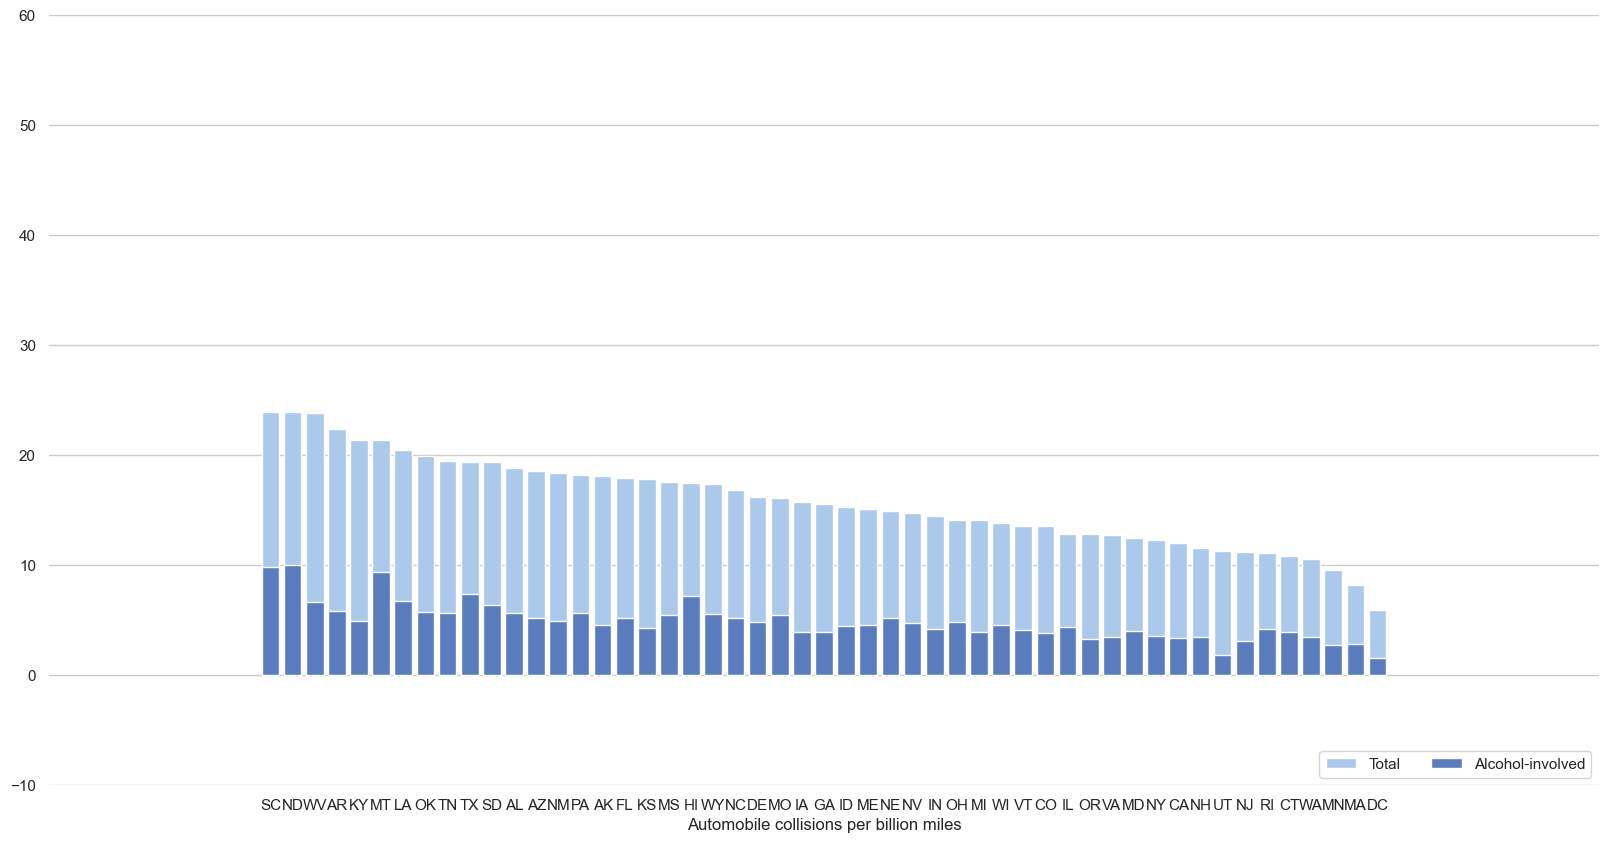

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="total", x="abbrev", data=crashes, label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(y="alcohol", x="abbrev", data=crashes, label="Alcohol-involved", color="b")

# Add a legend and informative axis label

c:\Users\user\projects\trader\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


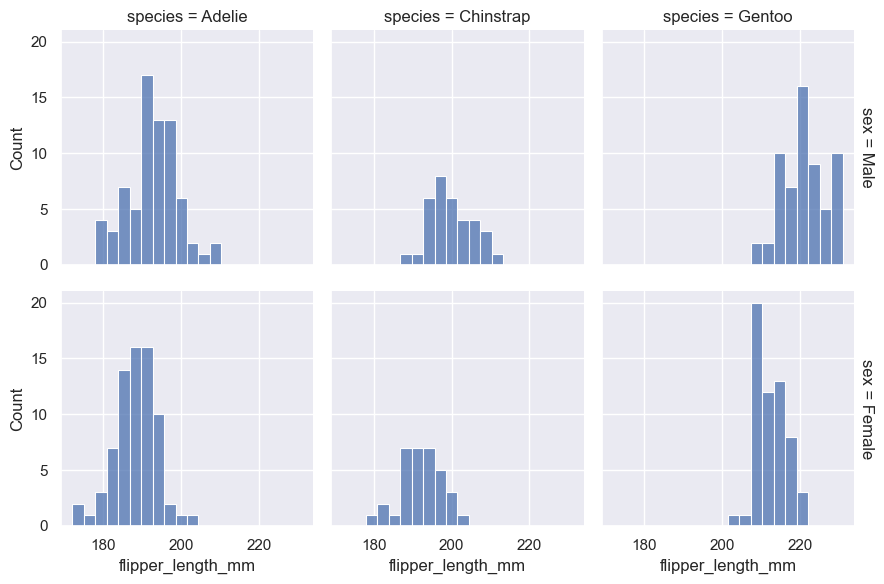

In [12]:
import seaborn as sns

sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

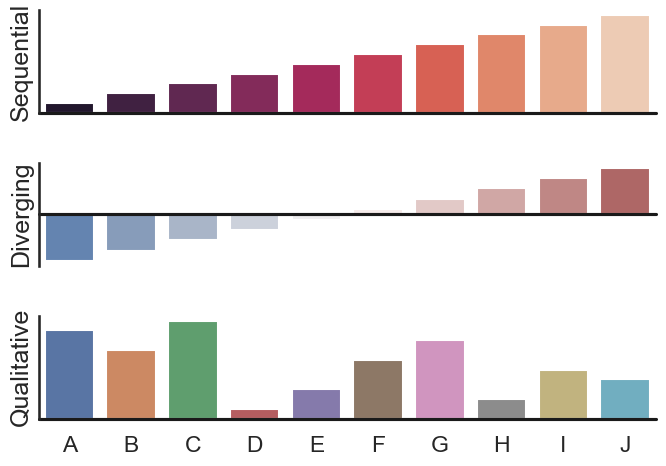

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, hue=x, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, hue=x, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, hue=x, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

c:\Users\user\projects\trader\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


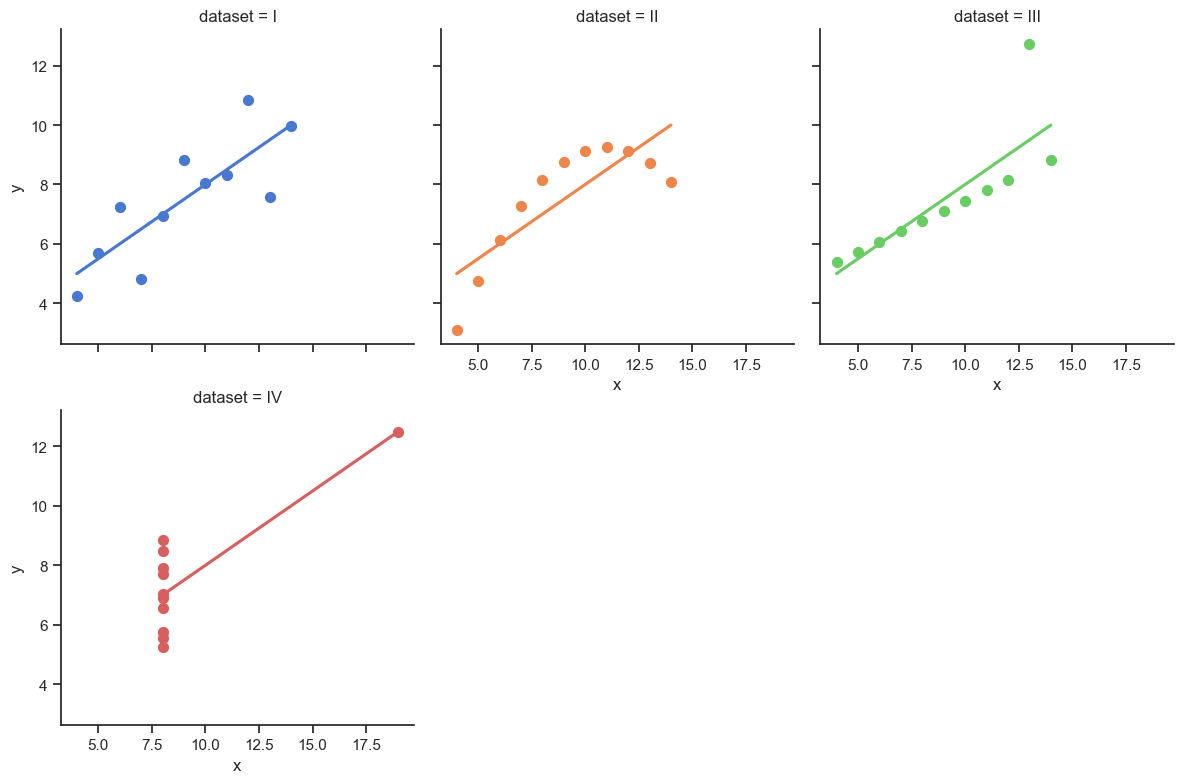

In [3]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=3, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)
display(df)